In [154]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import pandas as pd

In [148]:
AprilTags_GT = np.array([[2.18231 ,-1.00241, 0.063497, 2.72273, -1.5252, -3.14159],
                         [0.355922 ,-2.52591, 0.182571, -1.55564, 0, 0],
                         [-1.37, -1.97239, 0.171619, -1.5899, -0.031668 ,-1.02798],
                         [1.93896 ,1.00677, 0.714999, 2.69414, -1.52206, -2.12772],
                         [-0.261078 ,2.41413, 0.715152, 1.62084, -0, 0],
                         [-2.41415 ,0.847073, 0.231778, -2.56564, 1.55876, -3.14159],
                         [-2.42013 ,-0.917198, 0.182987, -0.552575 ,1.51267, 0],
                         [-0.330961, -1.21483, 0.145992, 0, 1.56923 ,0],
                         [0.15512, 0.022497, 0.284565, 3.14159, -1.53719 ,3.14159],
                         [-0.838766, 1.06507, 0.226611, 3.14159, 1.56809, 3.14159],
                         [2.00491, -1.32142, 0.311112, -3.05086, -1.48493 ,2.54362],
                         [0.933361, 1.27138, 0.299752, 1.59924, 0.047329, 0.001346]])

AprilTags_GT = AprilTags_GT[:,:3]

In [3]:
saved_path = "/home/mlpotter/.ros"

In [4]:
def parse_json(filename):
    f = open(filename)
    tag_dict = json.load(f)
    f.close()

    tag_array = np.zeros((len(tag_dict),3))

    for key,value in tag_dict.items():
        tag_array[int(key)] = value
        
    return tag_array


In [5]:
AprilTags_CKF = parse_json(os.path.join(saved_path,"AT_smoothed.json"))
AprilTags_Last = parse_json(os.path.join(saved_path,"AT_last.json"))

In [79]:
slam_map = np.load(os.path.join(saved_path,'grid_map.npy'))

In [80]:
AprilTags_GT[[0,10]]

array([[ 2.18231 , -1.00241 ,  0.063497,  2.72273 , -1.5252  , -3.14159 ],
       [ 2.00491 , -1.32142 ,  0.311112, -3.05086 , -1.48493 ,  2.54362 ]])

In [92]:
AprilTags_GT[1]

array([ 0.355922, -2.52591 ,  0.182571, -1.55564 ,  0.      ,  0.      ])

In [123]:
20/384

0.052083333333333336

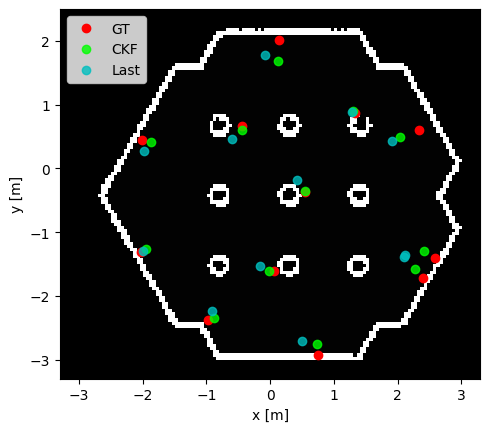

In [147]:
map_resolution = 0.05
height,width  = slam_map.shape
xmin,xmax,ymin,ymax = -width/2 *map_resolution,width/2 *map_resolution,-height/2 *map_resolution,height/2 *map_resolution
plt.imshow(np.flip(slam_map.T,axis=0),extent=[xmin,xmax,ymax,ymin],cmap='gray') #,origin=[-0.129,0.0074])

offset = 0.4
plt.plot(AprilTags_GT[:,0]+offset,AprilTags_GT[:,1]-offset,'ro',label="GT")
plt.plot(AprilTags_CKF[:,0]+offset,AprilTags_CKF[:,1]-offset,marker='o',color='lime',linestyle="",alpha=0.8,label="CKF")
plt.plot(AprilTags_Last[:,0]+offset,AprilTags_Last[:,1]-offset,'co',alpha=0.8,label="Last")
plt.xlim([-3.3,3.3])
plt.ylim([-3.3,2.5])
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.legend(loc="upper left")

In [160]:
ckf_mse = np.linalg.norm(AprilTags_GT-AprilTags_CKF,axis=1)
last_mse = np.linalg.norm(AprilTags_GT-AprilTags_Last,axis=1)
error_df = pd.DataFrame({"CKF":ckf_mse,"Last":last_mse},index=[f"Tag{i}" for i in range(12)])
error_df

,CKF,Last
Tag0,0.201707,0.469053
Tag1,0.168103,0.336295
Tag2,0.101336,0.150464
Tag3,0.315160,0.461507
Tag4,0.338751,0.327507
Tag5,0.144042,0.180915
Tag6,0.099495,0.031455
Tag7,0.093663,0.236953
Tag8,0.049028,0.238195
Tag9,0.069053,0.264521
